In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'imdb-review-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1092024%2F1836923%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240617%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240617T232952Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Db836d8c4f6d1a8bbfa25139e88ea5b2f9f987bd3d66a28f77aed857033a789df0877c2ba57876981047822d7dce60d9a077e86041ff9959e1b170a5194a3c36a34cf6571dca68f07425e0d108613b20d32620f61b1599e75d99e60e60bafbdd9e0c2f6e145188d1b1287410e92eab72071b966051eae0e756fed0984647fe0df13972d2c742d1e25b6e77c897c2130eae4404dbd6cc8c17ee4447d8bb76e256e8b14bd68c4abc14bef73e82456b70dcabc08c31afa47292e2d4fb6f3abe8cf2077c3cda28715ed49008ab1417c3e413321e3859e8867b4c289b5ac759442b0667019a808ef16989d621ecba7f154a739ad33f6c936f784370a4a4db81af19cd9'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2888741649 bytes downloaded
Downloaded and uncompressed: imdb-review-dataset
Data source import complete.


# Read Source Data

In [ ]:
# Import dependencies
import json # reading in source file
import re # regular expressions
import time
import pandas as pd
# TODO Investigate "SettingWithCopyWarning" and refactor df assignments using .loc
pd.options.mode.chained_assignment = None

In [ ]:
# Load data into dataframe
dataDir = "/kaggle/input/imdb-review-dataset/"
files_to_load = ["part-01.json", "part-02.json", "part-03.json", "part-04.json", "part-05.json", "part-06.json"]
reviews_json = list()

startTime = time.time()
for current_file in files_to_load:
    print(f"Starting load of {current_file}...")
    with open(f"{dataDir}/{current_file}", mode='r') as file:
        new_reviews = json.load(file)
        for review in new_reviews:
            reviews_json.append(review)
    print(f"Finished load of {current_file} at {time.time() - startTime:.2f} total seconds elapsed")
print(f"Loading complete after {time.time() - startTime:.2f} seconds, {len(reviews_json):,} items in reviews_json")

reviews_total_count = len(reviews_json)
print(f"Total reviews in the working data: {reviews_total_count:,}")

# Convert list of dicts to pandas dataframe
reviews_df_raw = pd.DataFrame(reviews_json)

Starting load of part-01.json...
Finished load of part-01.json at 9.18 total seconds elapsed
Starting load of part-02.json...
Finished load of part-02.json at 19.33 total seconds elapsed
Starting load of part-03.json...
Finished load of part-03.json at 30.67 total seconds elapsed
Starting load of part-04.json...
Finished load of part-04.json at 40.71 total seconds elapsed
Starting load of part-05.json...
Finished load of part-05.json at 52.73 total seconds elapsed
Starting load of part-06.json...
Finished load of part-06.json at 59.89 total seconds elapsed
Loading complete after 59.89 seconds, 5,571,499 items in reviews_json
Total reviews in the working data: 5,571,499


In [ ]:
## LIMITED RESOURCES MODE: COMMENT OUT ABOVE BLOCK AND UNCOMMENT BELOW BEFORE RUNNING NOTEBOOK
#part_one_filepath = 'DataFolder/part-01.json' # Replace with your filepath
#with open(part_one_filepath, mode='r') as file:
#    reviews_json = json.load(file)
#
## Remove the [...] piece below to test with the full ~1mil records in part-01.json
#reviews_df_raw = pd.DataFrame(reviews_json[0:100000]) # Use 100,000 records, about 10% of first chunk

# 1.EDA

## 1.1Trim Columns, Set Data Types

###Missing value

In [ ]:
# Peek at the data before get started
reviews_df_raw.head(10)

,review_id,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful
0,rw5704482,raeldor-96879,After Life (2019– ),9,Very Strong Season 2,3 May 2020,0,"I enjoyed the first season, but I must say I t...","[1, 1]"
1,rw5704483,dosleeb,The Valhalla Murders (2019– ),6,Icelandic detectives?,3 May 2020,0,I know Iceland is a small country and police d...,"[2, 2]"
2,rw5704484,brightconscious,Special OPS (2020– ),7,Nothing special,3 May 2020,0,"Except K K , no other actor looks comfortable ...","[0, 0]"
3,rw5704485,gasconyway,#BlackAF (2020– ),8,Good but,3 May 2020,0,I'm guessing that as a 62 year old white woman...,"[5, 9]"
4,rw5704487,mmason-15867,The Droving (2020),2,An honest review,3 May 2020,0,Here's the truth. There's not much to this mov...,"[26, 41]"
5,rw5704488,schroederagustavo,All About Eve (1950),10,Amazing,3 May 2020,0,Having seen this film for the first time today...,"[0, 1]"
6,rw5704489,welhof1,Runaway Train (1985),7,Impressive action scenes!,3 May 2020,0,The movie had some very impressive scenes. Esp...,"[0, 1]"
7,rw5704490,Evastar,Iron Fist (2017–2018),9,Another great Netflix Marvel show!,3 May 2020,0,I loved it from the first episode! And I could...,"[7, 9]"
8,rw5704491,tioeta,The Half of It (I) (2020),4,Needed the other half of the movie to cover up...,3 May 2020,0,I see that Netflix has a teenage/kids audience...,"[16, 26]"
9,rw5704492,stephenrifkin,This Is Us (2016– ),2,All the Pearsons are high maintenance and self...,3 May 2020,0,This is the show for people for whom nothing e...,"[1, 5]"


In [ ]:
# create a copy
reviews_df = reviews_df_raw.copy()

In [ ]:
# total number of rows
total_rows = reviews_df.shape[0]
print(f"Total rows in working data: {total_rows:,}")

Total rows in working data: 5,571,499


In [ ]:
# Check for na's
reviews_df.isna().sum()

review_id              0
reviewer               0
movie                  0
rating            662849
review_summary         0
review_date            0
spoiler_tag            0
review_detail          0
helpful                0
dtype: int64

In [ ]:
missing_values_count = reviews_df.isna().sum()

# Missing value percentage
missing_percentage = (missing_values_count / total_rows) * 100

print("Missing Value Percentage:")
print(missing_percentage)

Missing Value Percentage:
review_id          0.000000
reviewer           0.000000
movie              0.000000
rating            11.897139
review_summary     0.000000
review_date        0.000000
spoiler_tag        0.000000
review_detail      0.000000
helpful            0.000000
dtype: float64


In [ ]:
# Remove na's from rating, the only col with na's
raw_records_count = len(reviews_df["movie"])

reviews_df_trim = reviews_df[reviews_df["rating"].notna()]
trim_records_count = len(reviews_df_trim["movie"])

pct_with_rating = trim_records_count / raw_records_count * 100

print(f"After removing records with \'na\' rating {trim_records_count:,} remain out of original {raw_records_count:,} ({pct_with_rating:.2f}%)")

After removing records with 'na' rating 4,908,650 remain out of original 5,571,499 (88.10%)


In [ ]:
# Confirm removing na's was successful
if reviews_df_trim.isna().sum().sum() == 0:
    print("No remaining na's in working data.")
else:
    raise SystemExit(f"\'na\' values still present: \n{reviews_df_trim.isna().sum()}")

No remaining na's in working data.


###Data types

In [ ]:
# Check types of remaining columns so we know what to fix
# "object" in python is ok for text (movie, review_summary, and review_detail)
# Others we can correct as part of our initial cleaning
reviews_df_trim.dtypes

review_id         object
reviewer          object
movie             object
rating            object
review_summary    object
review_date       object
spoiler_tag        int64
review_detail     object
helpful           object
dtype: object

In [ ]:
# Cast ratings as int (safe now that NaNs have been removed)
reviews_df_trim["rating"] = reviews_df_trim["rating"].astype(int)

print("ratings summary stats")
print("Avg: ", reviews_df_trim["rating"].mean())
print("Max: ", reviews_df_trim["rating"].max())
print("Min: ", reviews_df_trim["rating"].min())
print("Med: ", reviews_df_trim["rating"].median())

ratings summary stats
Avg:  6.743157079848838
Max:  10
Min:  1
Med:  8.0


In [ ]:
# Cast spoiler_tag as boolean
reviews_df_trim["spoiler_tag"] = reviews_df_trim["spoiler_tag"] == 1
spoiler_value_counts = reviews_df_trim["spoiler_tag"].value_counts()
current_records_count = len(reviews_df_trim["spoiler_tag"])
spoiler_count = spoiler_value_counts[1]
spoiler_pct = spoiler_count / current_records_count * 100
print(f"Out of {current_records_count:,} reviews {spoiler_count:,} are spoilers ({spoiler_pct:.2f}%)\n")
print(spoiler_value_counts)

Out of 4,908,650 reviews 1,087,419 are spoilers (22.15%)

spoiler_tag
False    3821231
True     1087419
Name: count, dtype: int64


In [ ]:
# Check types once more to confirm recent changes
print(reviews_df_trim.dtypes)

# Peek at data to check our progress
reviews_df_trim.head()

review_id         object
reviewer          object
movie             object
rating             int64
review_summary    object
review_date       object
spoiler_tag         bool
review_detail     object
helpful           object
dtype: object


,review_id,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful
0,rw5704482,raeldor-96879,After Life (2019– ),9,Very Strong Season 2,3 May 2020,False,"I enjoyed the first season, but I must say I t...","[1, 1]"
1,rw5704483,dosleeb,The Valhalla Murders (2019– ),6,Icelandic detectives?,3 May 2020,False,I know Iceland is a small country and police d...,"[2, 2]"
2,rw5704484,brightconscious,Special OPS (2020– ),7,Nothing special,3 May 2020,False,"Except K K , no other actor looks comfortable ...","[0, 0]"
3,rw5704485,gasconyway,#BlackAF (2020– ),8,Good but,3 May 2020,False,I'm guessing that as a 62 year old white woman...,"[5, 9]"
4,rw5704487,mmason-15867,The Droving (2020),2,An honest review,3 May 2020,False,Here's the truth. There's not much to this mov...,"[26, 41]"


## 1.2 Delete TV shows

Most common pattern: "Title (2000)" or "Title (2000- )" or "Title (2000-2001)"

Also common pattern is "Title (2000) Season #, Episode #"

There are weird ones like 'The West: The People (1500-1806) (1996) Season 1, Episode 1'

Another: 'Red Riding: The Year of Our Lord 1980 (2009 TV Movie)'

Another: 'The Adventures of Moby Dick (1996 Video)'


This is also a good opportunity to remove TV shows from the dataset. TV shows should be cut out, but TV Movies and Video should be kept.
Any dashes in the year parsing indicate it's a show, and should not be carried forward in the analysis.

In [ ]:
# Separate Year using regular expressions
yearPattern = r'(?:\()(\d{4})(?!\-)?(?:\d{4})?(?:\sTV\sMovie)?(?:\sVideo)?(?:\s?\)$)(?!\sSeason\s\d+\,?\sEpisode\s\d+$)'

In [ ]:
# Use regex to pull years from movie column
yearExtract = reviews_df_trim["movie"].str.extract(yearPattern)
yearExtract.isna().sum()

0    901647
dtype: int64

In [ ]:
# Check records where not even one year was pulled through regex, these should all be shows
# Need specify [0] here because regex returns a list (in this case a list of length 1)
# Use list() on returned series to see full text of the column
list(reviews_df_trim[reviews_df_trim["movie"].str.extract(yearPattern)[0].isna()]["movie"])[0:15]

['After Life (2019– )',
 'The Valhalla Murders (2019– )',
 'Special OPS (2020– )',
 '#BlackAF (2020– )',
 'Iron Fist (2017–2018)',
 'This Is Us (2016– )',
 'Matchmaker Mysteries: A Fatal Romance (2020) Season 1, Episode 2',
 'Brooklyn Nine-Nine (2013– )',
 'After Life (2019– )',
 'The Raikar Case (2020– )',
 'Vida (2018–2020)',
 'Bloodline: Part 13 (2015) Season 1, Episode 13',
 'Jia you er nü (2005– )',
 'After Life (2019– )',
 'Four More Shots Please (2019– )']

In [ ]:
# used regex to pull the year from every record that matches the formatting
# create a dataframe excluding all TV show reviews, by only taking records that match the regex
movie_reviews_df = reviews_df_trim[reviews_df_trim["movie"].str.extract(yearPattern)[0].notna()]

before_regex_count = len(reviews_df_trim["movie"])
after_regex_count = len(movie_reviews_df["movie"])
pct_not_movie = after_regex_count / before_regex_count * 100

print(f"After removing TV Series, {after_regex_count:,} reviews remain out of {before_regex_count:,} ({pct_not_movie:.2f}%).")

After removing TV Series, 4,007,003 reviews remain out of 4,908,650 (81.63%).


In [ ]:
# Create year column to hold parsed year info
movie_reviews_df["year"] = movie_reviews_df["movie"].str.extract(yearPattern)[0]

In [ ]:
# Pull name from movies column
namePattern = r'^(.+)(?:\s\()'

In [ ]:
# This pattern is simpler, quickly check the regex is matching correctly
nameExtract = movie_reviews_df["movie"].str.extract(namePattern)
nameExtract[0:10]

,0
4,The Droving
5,All About Eve
6,Runaway Train
8,The Half of It (I)
10,Closure (I)
11,Unstoppable
13,Beastie Boys Story
14,"Ruben Brandt, Collector"
15,Some Kind of Hate
16,Cube Zero


In [ ]:
# Create column to hold parsed Title info
movie_reviews_df["title"] = movie_reviews_df["movie"].str.extract(namePattern)
movie_reviews_df.head()

,review_id,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful,year,title
4,rw5704487,mmason-15867,The Droving (2020),2,An honest review,3 May 2020,False,Here's the truth. There's not much to this mov...,"[26, 41]",2020,The Droving
5,rw5704488,schroederagustavo,All About Eve (1950),10,Amazing,3 May 2020,False,Having seen this film for the first time today...,"[0, 1]",1950,All About Eve
6,rw5704489,welhof1,Runaway Train (1985),7,Impressive action scenes!,3 May 2020,False,The movie had some very impressive scenes. Esp...,"[0, 1]",1985,Runaway Train
8,rw5704491,tioeta,The Half of It (I) (2020),4,Needed the other half of the movie to cover up...,3 May 2020,False,I see that Netflix has a teenage/kids audience...,"[16, 26]",2020,The Half of It (I)
10,rw5704494,andrewtschroeder,Closure (I) (2018),9,Fun and intriguing,3 May 2020,False,This is a fun and intriguing mystery. The acti...,"[2, 2]",2018,Closure (I)


In [ ]:
bad_titles_count = len(movie_reviews_df[movie_reviews_df["title"].isna()])
before_titles_cleaning_count = len(movie_reviews_df["title"])
if (bad_titles_count > 0):
    print(f"Bad titles detected: {bad_titles_count:,}")
    print(f"Before dropping title na's: {before_titles_cleaning_count:,}")
    print("Dropping records with irregularly formatted names: ")
    print(movie_reviews_df[movie_reviews_df["title"].isna()]["movie"].value_counts()) # List to display all
    movie_reviews_df.drop(movie_reviews_df[movie_reviews_df["title"].isna()].index, inplace = True)
else:
    print("No na values detected in title column.")

after_titles_cleaning_count = len(movie_reviews_df["title"])
print(f"After cleaning steps: {after_titles_cleaning_count:,} reviews remaining out of initial {reviews_total_count:,}")
clean_reviews_df = movie_reviews_df

Bad titles detected: 1
Before dropping title na's: 4,007,003
Dropping records with irregularly formatted names: 
movie
(1969)    1
Name: count, dtype: int64
After cleaning steps: 4,007,002 reviews remaining out of initial 5,571,499


## 1.3 Data Observation

### Rating

mean     6.654420
std      2.952341
min      1.000000
25%      5.000000
50%      7.000000
75%      9.000000
max     10.000000
Name: rating, dtype: float64

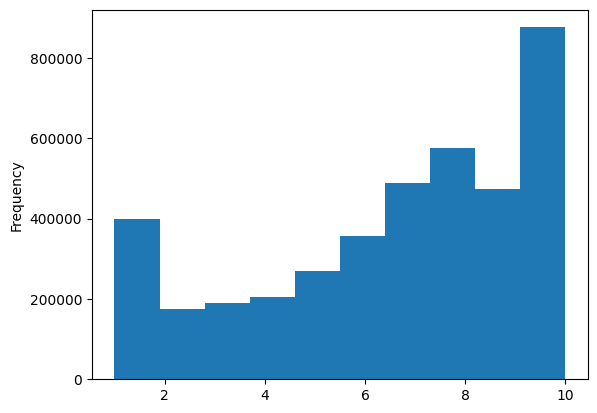

In [ ]:
# Does the spread of ratings pass a sanity check?
clean_reviews_df['rating'].plot(kind='hist')
clean_reviews_df['rating'].describe()[1:]

### Year

In [ ]:
# Which release years have the most review activity?
clean_reviews_df.groupby(['year']).count()['movie'].sort_values(ascending=False).head()

year
2019    315173
2018    260435
2020    215842
2017    175184
2016    137296
Name: movie, dtype: int64

In [ ]:
# Overall stats of years with reviews in working data
clean_reviews_df['year'] = clean_reviews_df['year'].astype(str).astype(int)
clean_reviews_df['year'].describe()[1:] # "count", the first index, is excluded to keep the format nice

mean    2000.846045
std       21.281040
min     1874.000000
25%     1996.000000
50%     2007.000000
75%     2016.000000
max     2022.000000
Name: year, dtype: float64

In [ ]:
# Verify oldest movie... chances are whoever is commenting on ancient film would mention how old it is
oldest_movie_review = clean_reviews_df.loc[clean_reviews_df["year"] == clean_reviews_df['year'].describe()["min"]]
print(list(oldest_movie_review["movie"])[0])# List() is an easy way to display a long string inside a series
list(oldest_movie_review["review_detail"])[0] # Use the [0] index in case there are multiple for the oldest movie

Passage de Venus (1874)


'OR IS IT?It is true that this is the very first sequential photographic series put to motion ever produced, there is an elephant in the room that needs to be addressed. The tragedy is that this is not actually the heavenly body of Venus passing before the great burning day ball in the sky. It is in fact, the world\'s first screen test, as these are only models, placeholders made to test the plates which would be used for the real deal. Regrettably, the actual footage of the Venusian transit may be lost forever. According to Wikipedia, "A 2005 study of the surviving material concluded that all the extant plates made with the photographic revolver are practice plates shot with a model and that none of the many plates successfully exposed during the eclipse seem to have survived."Yet we must interpret it as it is: A film. Indeed, it is fitting that man\'s first foray into something so invariably groundbreaking in influence, cultural impact and importance to art as film is indeed, baby st

In [ ]:
# Verify newest movie... nothing releasing in 2022 should have a review, but maybe it's tied to something still shooting
newest_movie_review = clean_reviews_df.loc[clean_reviews_df["year"] == clean_reviews_df['year'].describe()["max"]]
print(list(newest_movie_review["movie"])[0])
list(newest_movie_review["review_detail"])[0]

Iblis (2022)


'A for this movie title. We\'re shooting in dhaka in a empty place or empty plot this why we named this movie as "Empty House"'

###Helpful ratio distribution

In [ ]:
print(clean_reviews_df['helpful'].head())


4     [26, 41]
5       [0, 1]
6       [0, 1]
8     [16, 26]
10      [2, 2]
Name: helpful, dtype: object


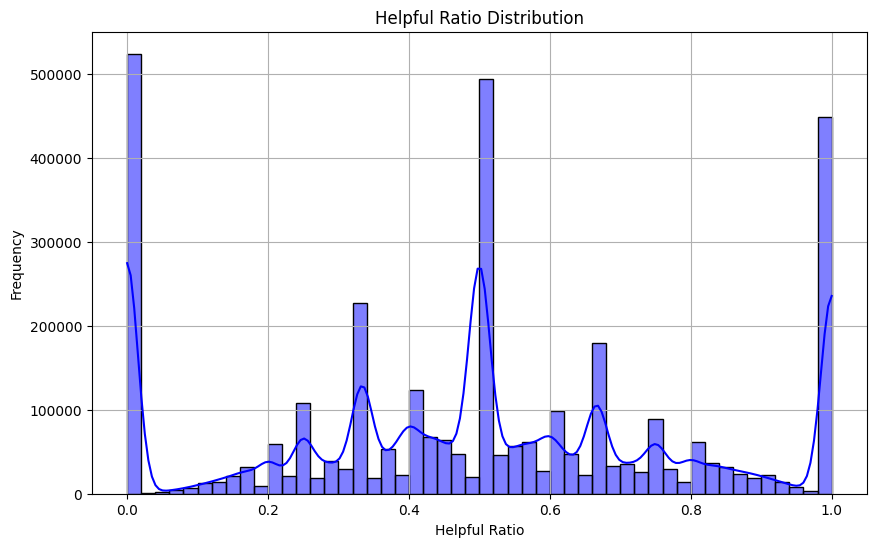

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 clean_reviews_df 是你的 DataFrame，并包含 'helpful' 列
# 示例数据: clean_reviews_df['helpful'] = [['26', '41'], ['0', '1'], ['16', '26']]

# 提取有用票和总票数
clean_reviews_df['helpful_votes'] = clean_reviews_df['helpful'].apply(lambda x: int(x[0].replace(',', '')))
clean_reviews_df['total_votes'] = clean_reviews_df['helpful'].apply(lambda x: int(x[1].replace(',', '')))

# 计算有用票比率
clean_reviews_df['helpful_ratio'] = clean_reviews_df['helpful_votes'] / clean_reviews_df['total_votes']

# 绘制有用票比率的直方图
plt.figure(figsize=(10, 6))
sns.histplot(clean_reviews_df['helpful_ratio'], bins=50, kde=True, color='blue')
plt.title('Helpful Ratio Distribution')
plt.xlabel('Helpful Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


###Review length distribution

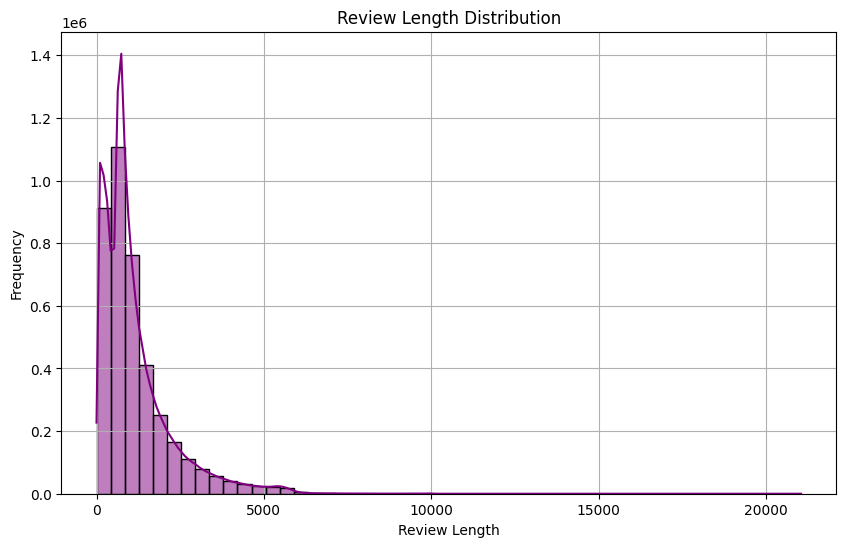

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 clean_reviews_df 是你的 DataFrame，并且已经包含 'review_detail' 列
# 示例数据: clean_reviews_df['review_detail'] = ["This is a great movie!", "Not bad, but could be better.", "Worst movie ever!"]

# 计算评论的字符长度
clean_reviews_df['review_length'] = clean_reviews_df['review_detail'].apply(len)

# 绘制评论长度的直方图
plt.figure(figsize=(10, 6))
sns.histplot(clean_reviews_df['review_length'], bins=50, kde=True, color='purple')
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


###Is the data balanced?

Helpfulness Counts:
 Is_Helpful
0    2841239
1    1165763
Name: count, dtype: int64

Helpfulness Percentage:
 Is_Helpful
0    70.906853
1    29.093147
Name: proportion, dtype: float64


<ipython-input-29-fea370991527>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=helpfulness_counts.index, y=helpfulness_counts.values, palette='viridis')


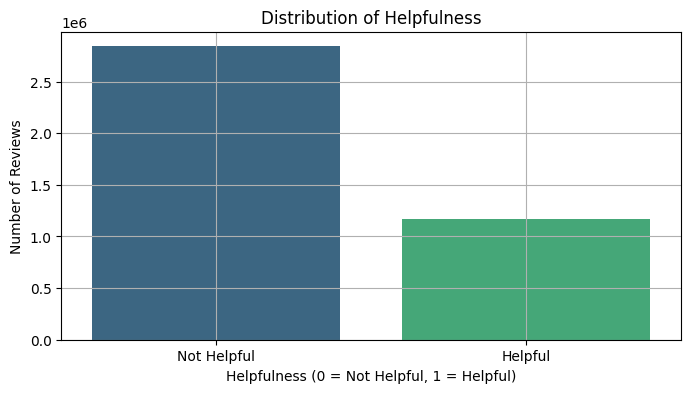

In [ ]:
# 创建二元标签
clean_reviews_df['Is_Helpful'] = (clean_reviews_df['helpful_ratio'] > 0.6).astype(int)

# 查看有用和不有用的评论分布
helpfulness_counts = clean_reviews_df['Is_Helpful'].value_counts()
helpfulness_percentage = clean_reviews_df['Is_Helpful'].value_counts(normalize=True) * 100

# 打印结果
print("Helpfulness Counts:\n", helpfulness_counts)
print("\nHelpfulness Percentage:\n", helpfulness_percentage)

# 可视化数据平衡情况
plt.figure(figsize=(8, 4))
sns.barplot(x=helpfulness_counts.index, y=helpfulness_counts.values, palette='viridis')
plt.title('Distribution of Helpfulness')
plt.xlabel('Helpfulness (0 = Not Helpful, 1 = Helpful)')
plt.ylabel('Number of Reviews')
plt.xticks([0, 1], ['Not Helpful', 'Helpful'])
plt.grid(True)
plt.show()


###correlation


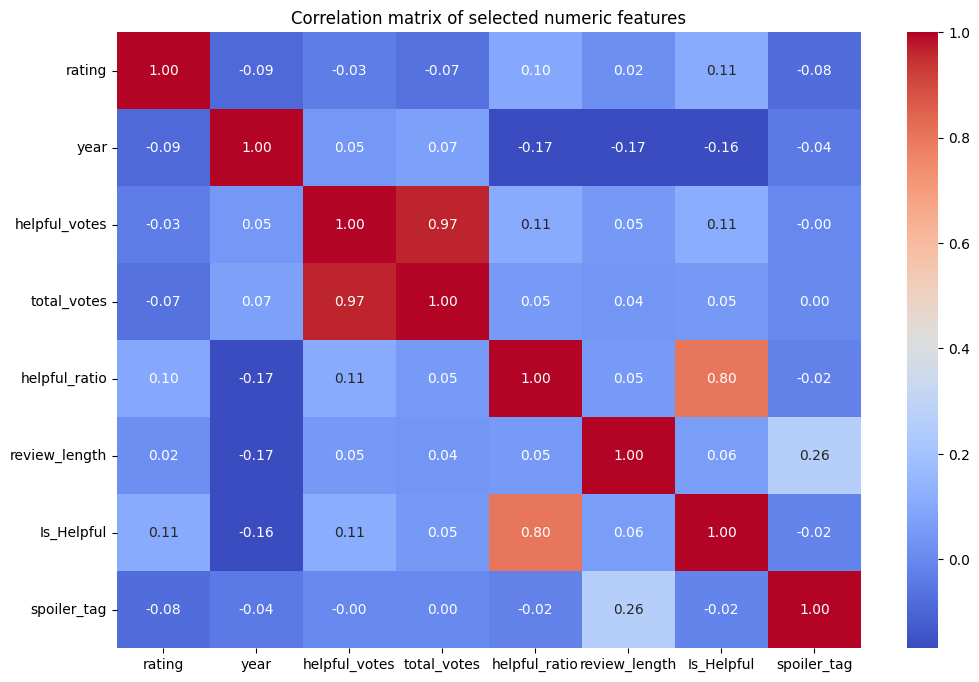

In [ ]:
# 先创建一个列表包括所有数值型数据列，显式排除任何非数值型列
numeric_columns = ['rating', 'year', 'helpful_votes', 'total_votes', 'helpful_ratio', 'review_length', 'Is_Helpful', 'spoiler_tag']

# 计算这些数值型列的相关性矩阵
correlation_matrix = clean_reviews_df[numeric_columns].corr()

# 绘制热力图
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation matrix of selected numeric features')
plt.show()


# 2.Data Processing

## 2.1 Missing value check

In [ ]:
import numpy as np
# 处理 total_votes 为 0 的情况，避免除以零错误
clean_reviews_df['helpful_ratio'] = np.where(clean_reviews_df['total_votes'] == 0, 0,
                                             clean_reviews_df['helpful_votes'] / clean_reviews_df['total_votes'])

# 再次检查有用票比率的缺失值
missing_helpful_ratio = clean_reviews_df['helpful_ratio'].isnull().sum()
print("Missing 'helpful_ratio' after adjustments:", missing_helpful_ratio)

Missing 'helpful_ratio' after adjustments: 0


In [ ]:
# 定义你需要检查的列
columns_to_check = ['rating', 'review_summary', 'review_detail', 'helpful', 'helpful_votes', 'total_votes', 'helpful_ratio', 'review_length', 'Is_Helpful']

# 计算并打印这些列的缺失值数量
missing_values = clean_reviews_df[columns_to_check].isnull().sum()
print(missing_values)


rating            0
review_summary    0
review_detail     0
helpful           0
helpful_votes     0
total_votes       0
helpful_ratio     0
review_length     0
Is_Helpful        0
dtype: int64


## 2.2 Remove Duplicate Reviews

In [ ]:
df = clean_reviews_df.drop_duplicates(subset=['review_id'])
print("After removing duplicates:", df.shape[0])

After removing duplicates: 3996265


## 2.2 Remove Reviews with Blank Text

In [ ]:
df = df[df['review_detail'].notna()]  # Remove NaN values in 'review_detail'
df = df[df['review_detail'].str.strip() != '']  # Remove empty strings
print("After removing blank reviews:", df.shape[0])


After removing blank reviews: 3996264


## 2.3 Filter Reviews Based on Total Votes

In [ ]:

df = df[df['total_votes'] >= 10]
print("After filtering reviews with at least 10 votes:", df.shape[0])

After filtering reviews with at least 10 votes: 1076875


## 2.4 Check Data Balance

Helpfulness Counts:
 Is_Helpful
0    695833
1    381042
Name: count, dtype: int64

Helpfulness Percentage:
 Is_Helpful
0    64.615949
1    35.384051
Name: proportion, dtype: float64


<ipython-input-36-e62dcfc853f5>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=helpfulness_counts.index, y=helpfulness_counts.values, palette='viridis')


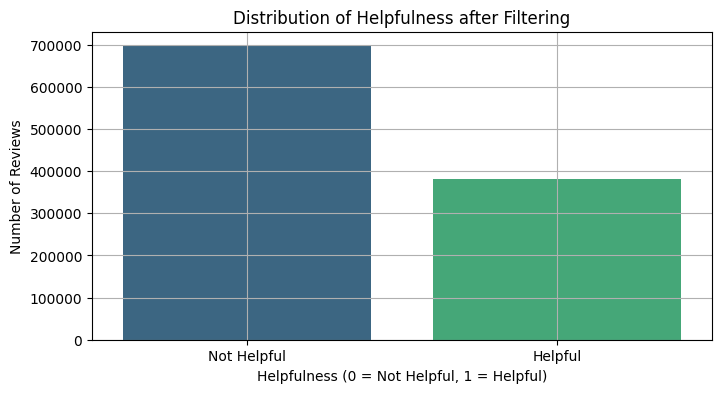

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# 创建二元标签
df['Is_Helpful'] = (df['helpful_ratio'] > 0.6).astype(int)

# 查看有用和不有用的评论分布
helpfulness_counts = df['Is_Helpful'].value_counts()
helpfulness_percentage = df['Is_Helpful'].value_counts(normalize=True) * 100

# 打印结果
print("Helpfulness Counts:\n", helpfulness_counts)
print("\nHelpfulness Percentage:\n", helpfulness_percentage)

# 可视化数据平衡情况
plt.figure(figsize=(8, 4))
sns.barplot(x=helpfulness_counts.index, y=helpfulness_counts.values, palette='viridis')
plt.title('Distribution of Helpfulness after Filtering')
plt.xlabel('Helpfulness (0 = Not Helpful, 1 = Helpful)')
plt.ylabel('Number of Reviews')
plt.xticks([0, 1], ['Not Helpful', 'Helpful'])
plt.grid(True)
plt.show()

## 2.5 Stratified Sampling

Sample Counts:
 Is_Helpful
0    34791
1    19052
Name: count, dtype: int64

Sample Percentage:
 Is_Helpful
0    64.615642
1    35.384358
Name: proportion, dtype: float64


<ipython-input-37-f28573ec76df>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sample_counts.index, y=sample_counts.values, palette='viridis')


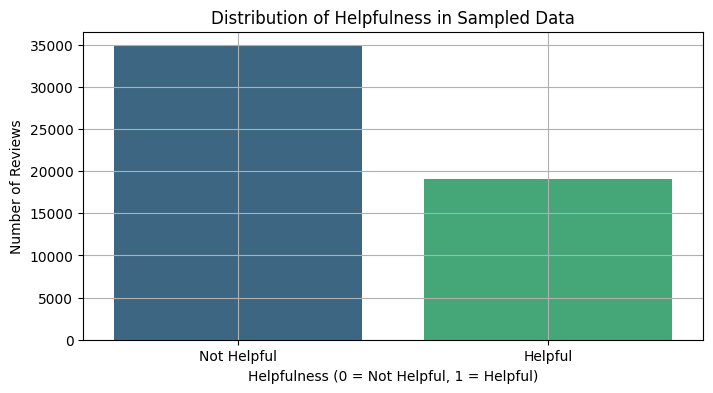

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


# 分层抽取5%的数据作为样本
df_sample, _ = train_test_split(df, test_size=0.95, stratify=df['Is_Helpful'], random_state=42)

# 检查抽取后的样本分布
sample_counts = df_sample['Is_Helpful'].value_counts()
sample_percentage = df_sample['Is_Helpful'].value_counts(normalize=True) * 100

print("Sample Counts:\n", sample_counts)
print("\nSample Percentage:\n", sample_percentage)

# 可视化样本数据平衡情况
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.barplot(x=sample_counts.index, y=sample_counts.values, palette='viridis')
plt.title('Distribution of Helpfulness in Sampled Data')
plt.xlabel('Helpfulness (0 = Not Helpful, 1 = Helpful)')
plt.ylabel('Number of Reviews')
plt.xticks([0, 1], ['Not Helpful', 'Helpful'])
plt.grid(True)
plt.show()

## 2.6 Balancing Data with Undersampling

Sample Counts:
 Is_Helpful
0    19052
1    19052
Name: count, dtype: int64

Sample Percentage:
 Is_Helpful
0    50.0
1    50.0
Name: proportion, dtype: float64


<ipython-input-38-d724fa471e28>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sample_counts.index, y=sample_counts.values, palette='viridis')


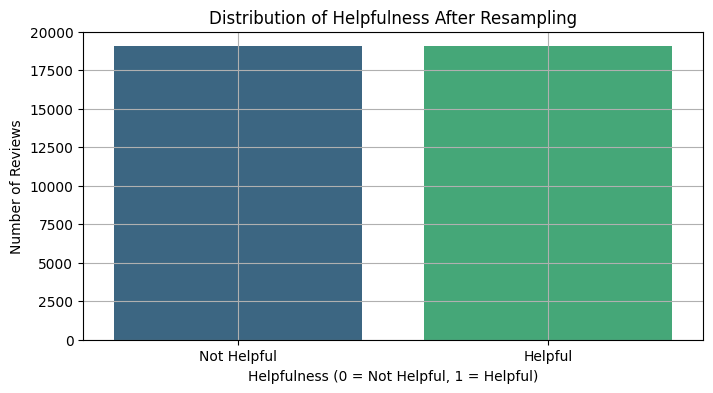

In [ ]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns

# 初始化欠采样器
rus = RandomUnderSampler(random_state=42)

# 应用欠采样
X_res, y_res = rus.fit_resample(df_sample.drop('Is_Helpful', axis=1), df_sample['Is_Helpful'])

# 将采样后的特征和目标变量组合回DataFrame
resampled_df = pd.DataFrame(X_res, columns=df_sample.drop('Is_Helpful', axis=1).columns)
resampled_df['Is_Helpful'] = y_res

# 计算采样后的数据分布
sample_counts = resampled_df['Is_Helpful'].value_counts()
sample_percentage = resampled_df['Is_Helpful'].value_counts(normalize=True) * 100

# 打印结果
print("Sample Counts:\n", sample_counts)
print("\nSample Percentage:\n", sample_percentage)

# 可视化数据平衡情况
plt.figure(figsize=(8, 4))
sns.barplot(x=sample_counts.index, y=sample_counts.values, palette='viridis')
plt.title('Distribution of Helpfulness After Resampling')
plt.xlabel('Helpfulness (0 = Not Helpful, 1 = Helpful)')
plt.ylabel('Number of Reviews')
plt.xticks([0, 1], ['Not Helpful', 'Helpful'])
plt.grid(True)
plt.show()


In [ ]:
# 应用欠采样后检查数据结构和类型
resampled_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38104 entries, 0 to 38103
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review_id       38104 non-null  object 
 1   reviewer        38104 non-null  object 
 2   movie           38104 non-null  object 
 3   rating          38104 non-null  int64  
 4   review_summary  38104 non-null  object 
 5   review_date     38104 non-null  object 
 6   spoiler_tag     38104 non-null  bool   
 7   review_detail   38104 non-null  object 
 8   helpful         38104 non-null  object 
 9   year            38104 non-null  object 
 10  title           38104 non-null  object 
 11  review_length   38104 non-null  int64  
 12  helpful_votes   38104 non-null  int64  
 13  total_votes     38104 non-null  int64  
 14  helpful_ratio   38104 non-null  float64
 15  Is_Helpful      38104 non-null  int64  
dtypes: bool(1), float64(1), int64(5), object(9)
memory usage: 4.4+ MB


## 2.7 Split dataset

In [ ]:
# 分割训练集和剩余部分（验证集和测试集）
X_train, X_temp, y_train, y_temp = train_test_split(
    resampled_df.drop('Is_Helpful', axis=1), resampled_df['Is_Helpful'],
    test_size=0.3, stratify=resampled_df['Is_Helpful'], random_state=42)

# 分割验证集和测试集
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5, stratify=y_temp, random_state=42)


In [ ]:
#check columns

print(X_train.columns)
print(X_val.columns)
print(X_test.columns)

Index(['review_id', 'reviewer', 'movie', 'rating', 'review_summary',
       'review_date', 'spoiler_tag', 'review_detail', 'helpful', 'year',
       'title', 'review_length', 'helpful_votes', 'total_votes',
       'helpful_ratio'],
      dtype='object')
Index(['review_id', 'reviewer', 'movie', 'rating', 'review_summary',
       'review_date', 'spoiler_tag', 'review_detail', 'helpful', 'year',
       'title', 'review_length', 'helpful_votes', 'total_votes',
       'helpful_ratio'],
      dtype='object')
Index(['review_id', 'reviewer', 'movie', 'rating', 'review_summary',
       'review_date', 'spoiler_tag', 'review_detail', 'helpful', 'year',
       'title', 'review_length', 'helpful_votes', 'total_votes',
       'helpful_ratio'],
      dtype='object')


In [ ]:
# 打印训练集中各类的数量
train_counts = y_train.value_counts()
print("Training Set Counts:\n", train_counts)

# 打印验证集中各类的数量
val_counts = y_val.value_counts()
print("\nValidation Set Counts:\n", val_counts)

# 打印测试集中各类的数量
test_counts = y_test.value_counts()
print("\nTest Set Counts:\n", test_counts)

Training Set Counts:
 Is_Helpful
1    13336
0    13336
Name: count, dtype: int64

Validation Set Counts:
 Is_Helpful
0    2858
1    2858
Name: count, dtype: int64

Test Set Counts:
 Is_Helpful
0    2858
1    2858
Name: count, dtype: int64


In [ ]:
print(X_train.info())
print(X_val.info())
print(X_test.info())


<class 'pandas.core.frame.DataFrame'>
Index: 26672 entries, 27712 to 5015
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review_id       26672 non-null  object 
 1   reviewer        26672 non-null  object 
 2   movie           26672 non-null  object 
 3   rating          26672 non-null  int64  
 4   review_summary  26672 non-null  object 
 5   review_date     26672 non-null  object 
 6   spoiler_tag     26672 non-null  bool   
 7   review_detail   26672 non-null  object 
 8   helpful         26672 non-null  object 
 9   year            26672 non-null  object 
 10  title           26672 non-null  object 
 11  review_length   26672 non-null  int64  
 12  helpful_votes   26672 non-null  int64  
 13  total_votes     26672 non-null  int64  
 14  helpful_ratio   26672 non-null  float64
dtypes: bool(1), float64(1), int64(4), object(9)
memory usage: 3.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 5716 en

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (26672, 15)
y_train shape: (26672,)


# 3.Feature Set Extraction

## 3.1 Textual& Sentiment Feature Sets

In [ ]:
#check columns

print(X_train.columns)
print(X_val.columns)
print(X_test.columns)



Index(['review_id', 'reviewer', 'movie', 'rating', 'review_summary',
       'review_date', 'spoiler_tag', 'review_detail', 'helpful', 'year',
       'title', 'review_length', 'helpful_votes', 'total_votes',
       'helpful_ratio'],
      dtype='object')
Index(['review_id', 'reviewer', 'movie', 'rating', 'review_summary',
       'review_date', 'spoiler_tag', 'review_detail', 'helpful', 'year',
       'title', 'review_length', 'helpful_votes', 'total_votes',
       'helpful_ratio'],
      dtype='object')
Index(['review_id', 'reviewer', 'movie', 'rating', 'review_summary',
       'review_date', 'spoiler_tag', 'review_detail', 'helpful', 'year',
       'title', 'review_length', 'helpful_votes', 'total_votes',
       'helpful_ratio'],
      dtype='object')


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive

# 挂载 Google Drive 到 Colab Notebook
drive.mount('/content/drive')

def preview_file(file_path, lines=5):
    # 确保文件路径是从挂载的 Google Drive 开始的完整路径
    with open(file_path, 'r') as file:
        for i, line in enumerate(file):
            print(line.strip())
            if i >= lines - 1:
                break

# 注意更新文件路径以匹配你在 Google Drive 中的文件位置
preview_file('/content/drive/My Drive/Colab Notebooks/vader_lexicon.txt')

Mounted at /content/drive
$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]


In [ ]:
from google.colab import drive

# 挂载 Google Drive 到 Colab Notebook
drive.mount('/content/drive')

def load_vader_lexicon(file_path):
    lexicon = {}
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')  # 使用制表符进行分割
            if len(parts) >= 2:
                word = parts[0]  # 词或表情符号
                measure = parts[1]  # 情绪得分
                lexicon[word] = float(measure)
    return lexicon

# 在调用函数时提供实际的文件路径
# 确保你的文件路径是完整的，指向 Google Drive 中的正确位置
vader_lexicon = load_vader_lexicon('/content/drive/My Drive/Colab Notebooks/vader_lexicon.txt')
print("Loaded lexicon entries:", len(vader_lexicon))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded lexicon entries: 7502


In [ ]:
# 打印词典中的前10个条目来查看
for i, (key, value) in enumerate(vader_lexicon.items()):
    print(key, value)
    if i >= 9:
        break

$: -1.5
%) -0.4
%-) -1.5
&-: -0.4
&: -0.7
( '}{' ) 1.6
(% -0.9
('-: 2.2
(': 2.3
((-: 2.1


In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize

# 定义文本特征提取函数
def extract_text_features(data):
    data = data.copy()  # 避免修改原始DataFrame
    data['Char_Len'] = data['review_detail'].apply(len)
    data['nWord'] = data['review_detail'].apply(lambda x: len(word_tokenize(x)))
    data['nSen'] = data['review_detail'].apply(lambda x: len(sent_tokenize(x)))
    data['WPS'] = data.apply(lambda row: row['nWord'] / row['nSen'] if row['nSen'] > 0 else 0, axis=1)
    data['Avg_W_Len'] = data['review_detail'].apply(lambda x: np.mean([len(word) for word in word_tokenize(x)]) if len(word_tokenize(x)) > 0 else 0)
    return data[['Char_Len', 'nWord', 'nSen', 'WPS', 'Avg_W_Len']]

# 情绪分析功能
def calculate_sentiment(text, lexicon):
    words = word_tokenize(text.lower())
    scores = {word: lexicon.get(word, 0) for word in words}
    compound = sum(scores.values())
    pos = sum(1 for score in scores.values() if score > 0)
    neg = sum(1 for score in scores.values() if score < 0)
    neu = sum(1 for score in scores.values() if score == 0)
    total = pos + neg + neu
    return neg, pos, neu, compound

# 提取情绪特征
def extract_sentiment_features(data, lexicon):
    sentiment_scores = data['review_detail'].apply(lambda x: pd.Series(calculate_sentiment(x, lexicon), index=['Neg', 'Pos', 'Neu', 'Compound']))
    return sentiment_scores

# 应用文本特征提取
X_train_text_features = extract_text_features(X_train)
X_val_text_features = extract_text_features(X_val)
X_test_text_features = extract_text_features(X_test)

# 应用情绪特征提取
X_train_sentiment = extract_sentiment_features(X_train, vader_lexicon)
X_val_sentiment = extract_sentiment_features(X_val, vader_lexicon)
X_test_sentiment = extract_sentiment_features(X_test, vader_lexicon)

# 合并文本特征和情绪特征
X_train_final = pd.concat([X_train_text_features, X_train_sentiment], axis=1)
X_val_final = pd.concat([X_val_text_features, X_val_sentiment], axis=1)
X_test_final = pd.concat([X_test_text_features, X_test_sentiment], axis=1)



In [ ]:
# 文本+spoiler tag
X_train_text_spoiler = pd.concat([X_train_text_features, X_train[['spoiler_tag']]], axis=1)
X_val_text_spoiler = pd.concat([X_val_text_features, X_val[['spoiler_tag']]], axis=1)
X_test_text_spoiler = pd.concat([X_test_text_features, X_test[['spoiler_tag']]], axis=1)

# 文本+情绪+spoiler tag
X_train_three = pd.concat([X_train_text_features, X_train_sentiment, X_train[['spoiler_tag']]], axis=1)
X_val_three = pd.concat([X_val_text_features, X_val_sentiment, X_val[['spoiler_tag']]], axis=1)
X_test_three = pd.concat([X_test_text_features, X_test_sentiment, X_test[['spoiler_tag']]], axis=1)



In [ ]:
# 查看训练集的前五行
print("Training set preview:")
print(X_train_final.head())

# 查看验证集的前五行
print("\nValidation set preview:")
print(X_val_final.head())

# 查看测试集的前五行
print("\nTest set preview:")
print(X_test_final.head())


Training set preview:
       Char_Len  nWord  nSen   WPS  Avg_W_Len   Neg  Pos    Neu  Compound
27712       115     23     2  11.5   4.304348   0.0  2.0   18.0       4.7
17458       607    126     6  21.0   4.007937  12.0  5.0   67.0      -6.2
30857      1980    386    10  38.6   4.266839   9.0  8.0  180.0      -0.5
27610       661    129     6  21.5   4.193798   1.0  6.0   83.0       9.9
35121       425     78     3  26.0   4.589744   3.0  4.0   56.0       3.1

Validation set preview:
       Char_Len  nWord  nSen        WPS  Avg_W_Len  Neg   Pos    Neu  Compound
853        1242    248    10  24.800000   4.185484  4.0  23.0  118.0      45.1
23405       435     75     4  18.750000   4.906667  1.0   3.0   57.0       5.1
855        1679    298     7  42.571429   4.761745  8.0  11.0  158.0       5.6
23716      1003    217    14  15.500000   3.843318  1.0   5.0  102.0       4.8
32766       626    131     4  32.750000   3.961832  4.0   7.0   79.0       4.4

Test set preview:
       Char_Len 

## 3.2 Sentiment Feature Set(弃用，忽略）





In [ ]:
from google.colab import drive

# 挂载 Google Drive 到 Colab Notebook
drive.mount('/content/drive')

def load_vader_lexicon(file_path):
    lexicon = {}
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')  # 使用制表符进行分割
            if len(parts) >= 2:
                word = parts[0]  # 词或表情符号
                measure = parts[1]  # 情绪得分
                lexicon[word] = float(measure)
    return lexicon

# 在调用函数时提供实际的文件路径
# 确保你的文件路径是完整的，指向 Google Drive 中的正确位置
vader_lexicon = load_vader_lexicon('/content/drive/My Drive/Colab Notebooks/vader_lexicon.txt')
print("Loaded lexicon entries:", len(vader_lexicon))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded lexicon entries: 7502


In [ ]:
# 打印词典中的前10个条目来查看
for i, (key, value) in enumerate(vader_lexicon.items()):
    print(key, value)
    if i >= 9:
        break

$: -1.5
%) -0.4
%-) -1.5
&-: -0.4
&: -0.7
( '}{' ) 1.6
(% -0.9
('-: 2.2
(': 2.3
((-: 2.1


In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
import ast

# 定义一个函数来计算文本的情感
def calculate_sentiment(text, lexicon):
    words = word_tokenize(text.lower())
    scores = [lexicon.get(word, 0) for word in words]
    compound = sum(scores)
    pos = sum(1 for score in scores if score > 0)
    neg = sum(1 for score in scores if score < 0)
    neu = sum(1 for score in scores if score == 0)
    total = pos + neg + neu
    return neg, pos, neu, compound if total else (0, 0, 0, 0)

# 加载情感词典
vader_lexicon = load_vader_lexicon('/content/drive/My Drive/Colab Notebooks/vader_lexicon.txt')

# 确保review_detail列是字符串类型
X_train['review_detail'] = X_train['review_detail'].astype(str)

# 应用函数计算情感得分
X_train[['Neg', 'Pos', 'Neu', 'Compound']] = X_train['review_detail'].apply(
    lambda x: pd.Series(calculate_sentiment(x, vader_lexicon))
)

# 预览添加的情感特征
print(X_train[['Neg', 'Pos', 'Neu', 'Compound']].head())


          Neg   Pos    Neu  Compound
1193067   2.0   0.0   53.0      -5.1
2251117  11.0  17.0  272.0      13.9
913054    2.0   1.0   25.0      -1.7
4138293  10.0  16.0  232.0      13.9
2226269   1.0  10.0   67.0      19.7


In [ ]:
# 输出情感分析结果的描述性统计
print(X_train[['Neg', 'Pos', 'Neu', 'Compound']].describe())

                Neg           Pos           Neu      Compound
count  37690.000000  37690.000000  37690.000000  37690.000000
mean       7.778695     12.413133    231.321305      8.271902
std        7.915865     10.759482    205.591087     16.790396
min        0.000000      0.000000      1.000000   -133.700000
25%        2.000000      5.000000    108.000000     -1.100000
50%        6.000000     10.000000    167.000000      6.200000
75%       10.000000     16.000000    290.000000     15.800000
max      125.000000    141.000000   3574.000000    238.600000


# 4.Model building

## 4.1 Logistic Regression

### Textual Features

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (26672, 15)
y_train shape: (26672,)


In [ ]:
print("Shape of X_train_text_features:", X_train_text_features.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train_text_features: (26672, 5)
Shape of y_train: (26672,)


In [ ]:
print("X_train_text_features shape:", X_train_text_features.shape)
print("y_train shape:", y_train.shape)


X_train_text_features shape: (26672, 5)
y_train shape: (26672,)


In [ ]:
print("NA values in X_train_text_features:", X_train_text_features.isna().sum())


NA values in X_train_text_features: Char_Len     0
nWord        0
nSen         0
WPS          0
Avg_W_Len    0
dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 初始化逻辑回归模型
modelLR = LogisticRegression(max_iter=1000)

# 使用训练集训练模型
modelLR.fit(X_train_text_features, y_train)

# 训练集上的预测
y_train_pred = modelLR.predict(X_train_text_features)
y_train_scores = modelLR.predict_proba(X_train_text_features)[:, 1]

# 使用验证集预测
y_val_pred = modelLR.predict(X_val_text_features)
y_val_scores = modelLR.predict_proba(X_val_text_features)[:, 1]

# 使用测试集预测
y_test_pred = modelLR.predict(X_test_text_features)
y_test_scores = modelLR.predict_proba(X_test_text_features)[:, 1]

# 打印训练集、验证集和测试集的分类报告和性能指标
print("Training Set Metrics:")
print(classification_report(y_train, y_train_pred))
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_scores)
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")
print(f"AUC: {train_auc}")

print("\nValidation Set Metrics:")
print(classification_report(y_val, y_val_pred))
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_auc = roc_auc_score(y_val, y_val_scores)
print(f"Accuracy: {val_accuracy}")
print(f"Precision: {val_precision}")
print(f"Recall: {val_recall}")
print(f"F1 Score: {val_f1}")
print(f"AUC: {val_auc}")

print("\nTest Set Metrics:")
print(classification_report(y_test, y_test_pred))
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_scores)
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")
print(f"AUC: {test_auc}")


Training Set Metrics:
              precision    recall  f1-score   support

           0       0.54      0.71      0.61     13336
           1       0.58      0.41      0.48     13336

    accuracy                           0.56     26672
   macro avg       0.56      0.56      0.55     26672
weighted avg       0.56      0.56      0.55     26672

Accuracy: 0.5581883623275345
Precision: 0.5824129141886151
Recall: 0.4112177564487103
F1 Score: 0.4820675105485232
AUC: 0.5804983012095841

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.55      0.72      0.62      2858
           1       0.60      0.41      0.49      2858

    accuracy                           0.57      5716
   macro avg       0.57      0.57      0.56      5716
weighted avg       0.57      0.57      0.56      5716

Accuracy: 0.5661301609517145
Precision: 0.5959390862944163
Recall: 0.410776766969909
F1 Score: 0.4863297431648716
AUC: 0.5883664309384582

Test Set Metrics:
   

###  Add Spolier tag

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 初始化逻辑回归模型
modelLR = LogisticRegression(max_iter=1000)

# 使用训练集训练模型
modelLR.fit(X_train_text_spoiler, y_train)

# 训练集上的预测
y_train_pred = modelLR.predict(X_train_text_spoiler)
y_train_scores = modelLR.predict_proba(X_train_text_spoiler)[:, 1]

# 使用验证集预测
y_val_pred = modelLR.predict(X_val_text_spoiler)
y_val_scores = modelLR.predict_proba(X_val_text_spoiler)[:, 1]

# 使用测试集预测
y_test_pred = modelLR.predict(X_test_text_spoiler)
y_test_scores = modelLR.predict_proba(X_test_text_spoiler)[:, 1]

# 打印训练集、验证集和测试集的分类报告和性能指标
print("Training Set Metrics:")
print(classification_report(y_train, y_train_pred))
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_scores)
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")
print(f"AUC: {train_auc}")

print("\nValidation Set Metrics:")
print(classification_report(y_val, y_val_pred))
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_auc = roc_auc_score(y_val, y_val_scores)
print(f"Accuracy: {val_accuracy}")
print(f"Precision: {val_precision}")
print(f"Recall: {val_recall}")
print(f"F1 Score: {val_f1}")
print(f"AUC: {val_auc}")

print("\nTest Set Metrics:")
print(classification_report(y_test, y_test_pred))
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_scores)
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")
print(f"AUC: {test_auc}")



Training Set Metrics:
              precision    recall  f1-score   support

           0       0.56      0.64      0.60     13336
           1       0.58      0.51      0.54     13336

    accuracy                           0.57     26672
   macro avg       0.57      0.57      0.57     26672
weighted avg       0.57      0.57      0.57     26672

Accuracy: 0.5728104379124175
Precision: 0.5840838240387946
Recall: 0.5057738452309538
F1 Score: 0.5421154155280501
AUC: 0.5934272035065092

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.57      0.65      0.61      2858
           1       0.59      0.50      0.54      2858

    accuracy                           0.58      5716
   macro avg       0.58      0.58      0.57      5716
weighted avg       0.58      0.58      0.57      5716

Accuracy: 0.5769769069279216
Precision: 0.5900163666121113
Recall: 0.5045486354093772
F1 Score: 0.5439456808751415
AUC: 0.6034018783168409

Test Set Metrics:
  

### Add Sentiment Features

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 初始化逻辑回归模型
modelLR = LogisticRegression(max_iter=1000)

# 使用包含文本特征、情绪和spoiler标签的训练集训练模型
modelLR.fit(X_train_three, y_train)

# 训练集上的预测
y_train_pred = modelLR.predict(X_train_three)
y_train_scores = modelLR.predict_proba(X_train_three)[:, 1]

# 使用验证集预测
y_val_pred = modelLR.predict(X_val_three)
y_val_scores = modelLR.predict_proba(X_val_three)[:, 1]

# 使用测试集预测
y_test_pred = modelLR.predict(X_test_three)
y_test_scores = modelLR.predict_proba(X_test_three)[:, 1]

# 打印训练集、验证集和测试集的分类报告和性能指标
print("Training Set Metrics:")
print(classification_report(y_train, y_train_pred))
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_scores)
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")
print(f"AUC: {train_auc}")

print("\nValidation Set Metrics:")
print(classification_report(y_val, y_val_pred))
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_auc = roc_auc_score(y_val, y_val_scores)
print(f"Accuracy: {val_accuracy}")
print(f"Precision: {val_precision}")
print(f"Recall: {val_recall}")
print(f"F1 Score: {val_f1}")
print(f"AUC: {val_auc}")

print("\nTest Set Metrics:")
print(classification_report(y_test, y_test_pred))
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_scores)
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")
print(f"AUC: {test_auc}")


Training Set Metrics:
              precision    recall  f1-score   support

           0       0.59      0.63      0.61     13336
           1       0.60      0.56      0.58     13336

    accuracy                           0.59     26672
   macro avg       0.59      0.59      0.59     26672
weighted avg       0.59      0.59      0.59     26672

Accuracy: 0.5933563287342531
Precision: 0.6005329457364341
Recall: 0.5576634673065387
F1 Score: 0.5783048211508552
AUC: 0.6198338110572247

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.60      0.65      0.62      2858
           1       0.62      0.56      0.59      2858

    accuracy                           0.61      5716
   macro avg       0.61      0.61      0.60      5716
weighted avg       0.61      0.61      0.60      5716

Accuracy: 0.605668299510147
Precision: 0.61579754601227
Recall: 0.5619314205738278
F1 Score: 0.5876326381266007
AUC: 0.6385845093218011

Test Set Metrics:
     

## 4.2 SVM

### Textual Features

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 初始化SVM模型
modelSVM = SVC(kernel='linear', probability=True, max_iter=1000)

# 使用训练集训练模型
modelSVM.fit(X_train_text_features, y_train)

# 训练集上的预测
y_train_pred = modelSVM.predict(X_train_text_features)
y_train_scores = modelSVM.predict_proba(X_train_text_features)[:, 1]

# 使用验证集预测
y_val_pred = modelSVM.predict(X_val_text_features)
y_val_scores = modelSVM.predict_proba(X_val_text_features)[:, 1]

# 使用测试集预测
y_test_pred = modelSVM.predict(X_test_text_features)
y_test_scores = modelSVM.predict_proba(X_test_text_features)[:, 1]

# 打印训练集、验证集和测试集的分类报告和性能指标
print("Training Set Metrics:")
print(classification_report(y_train, y_train_pred))
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_scores)
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")
print(f"AUC: {train_auc}")

print("\nValidation Set Metrics:")
print(classification_report(y_val, y_val_pred))
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_auc = roc_auc_score(y_val, y_val_scores)
print(f"Accuracy: {val_accuracy}")
print(f"Precision: {val_precision}")
print(f"Recall: {val_recall}")
print(f"F1 Score: {val_f1}")
print(f"AUC: {val_auc}")

print("\nTest Set Metrics:")
print(classification_report(y_test, y_test_pred))
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_scores)
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")
print(f"AUC: {test_auc}")


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training Set Metrics:
              precision    recall  f1-score   support

           0       0.51      0.85      0.64     13336
           1       0.57      0.20      0.29     13336

    accuracy                           0.52     26672
   macro avg       0.54      0.52      0.47     26672
weighted avg       0.54      0.52      0.47     26672

Accuracy: 0.5241451709658068
Precision: 0.569396551724138
Recall: 0.1981103779244151
F1 Score: 0.29394748553627054
AUC: 0.5

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.52      0.86      0.65      2858
           1       0.59      0.20      0.30      2858

    accuracy                           0.53      5716
   macro avg       0.56      0.53      0.47      5716
weighted avg       0.56      0.53      0.47      5716

Accuracy: 0.5313156053184045
Precision: 0.5914198161389173
Recall: 0.20258922323303008
F1 Score: 0.3017982799061767
AUC: 0.5

Test Set Metrics:
              precision    reca

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the parameter grid: try different kernels and, for the RBF kernel, various values of C and gamma
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],  # different kernel types
    'C': [0.1, 1, 10],  # regularization parameter
    'gamma': [0.001, 0.01, 0.1, 1]  # kernel coefficient for 'rbf', 'poly'
}

# Initialize the SVM model
modelSVM = SVC(probability=True, max_iter=1000)

# Setup the grid search with cross-validation
grid_search = GridSearchCV(modelSVM, param_grid, cv=3, scoring='accuracy', verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_text_features, y_train)

# Best estimator found by grid search
best_svm = grid_search.best_estimator_

# Predictions with the best estimator
y_train_pred = best_svm.predict(X_train_text_features)
y_train_scores = best_svm.predict_proba(X_train_text_features)[:, 1]
y_val_pred = best_svm.predict(X_val_text_features)
y_val_scores = best_svm.predict_proba(X_val_text_features)[:, 1]
y_test_pred = best_svm.predict(X_test_text_features)
y_test_scores = best_svm.predict_proba(X_test_text_features)[:, 1]

# Print the best parameters and the metrics
print("Best Parameters:", grid_search.best_params_)
print("Training Set Metrics:")
print(classification_report(y_train, y_train_pred))
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_scores)
print(f"Accuracy: {train_accuracy}, Precision: {train_precision}, Recall: {train_recall}, F1 Score: {train_f1}, AUC: {train_auc}")

print("\nValidation Set Metrics:")
print(classification_report(y_val, y_val_pred))
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_auc = roc_auc_score(y_val, y_val_scores)
print(f"Accuracy: {val_accuracy}, Precision: {val_precision}, Recall: {val_recall}, F1 Score: {val_f1}, AUC: {val_auc}")

print("\nTest Set Metrics:")
print(classification_report(y_test, y_test_pred))
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_scores)
print(f"Accuracy: {test_accuracy}, Precision: {test_precision}, Recall: {test_recall}, F1 Score: {test_f1}, AUC: {test_auc}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=  12.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=  11.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=  11.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  11.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  11.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  11.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  10.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  10.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  10.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   9.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   9.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   9.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=  11.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=  11.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=  11.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  11.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  11.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  10.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  10.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  10.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  10.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ........................C=1, gamma=1, kernel=linear; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ........................C=1, gamma=1, kernel=linear; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ........................C=1, gamma=1, kernel=linear; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   9.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   9.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   9.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=  11.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   9.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=  10.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   8.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   8.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   8.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   7.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   8.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   8.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   9.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   9.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   9.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .........................C=10, gamma=1, kernel=poly; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .........................C=10, gamma=1, kernel=poly; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
Training Set Metrics:
              precision    recall  f1-score   support

           0       0.52      0.84      0.64     13336
           1       0.57      0.21      0.31     13336

    accuracy                           0.53     26672
   macro avg       0.54      0.53      0.47     26672
weighted avg       0.54      0.53      0.47     26672

Accuracy: 0.5253449310137972, Precision: 0.5674112485041882, Recall: 0.21333233353329334, F1 Score: 0.31008174386920984, AUC: 0.4324226617633882

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.52      0.85      0.65      2858
           1       0.59      0.22      0.32      2858

    accuracy                           0.53      5716
   macro avg       0.56      0.53      0.48      5716
weighted avg       0.56      0.53      0.48      5716

Accuracy: 0.5334149755073478, Precision: 0.5903500473036897, Recall: 0.21833449965010496, F

###  Add Spolier tag

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 初始化SVM模型
modelSVM = SVC(kernel='linear', probability=True, max_iter=1000)

# 使用训练集训练模型
modelSVM.fit(X_train_text_spoiler, y_train)  # 使用包含spoiler_tag的特征集

# 训练集上的预测
y_train_pred = modelSVM.predict(X_train_text_spoiler)
y_train_scores = modelSVM.predict_proba(X_train_text_spoiler)[:, 1]

# 使用验证集预测
y_val_pred = modelSVM.predict(X_val_text_spoiler)
y_val_scores = modelSVM.predict_proba(X_val_text_spoiler)[:, 1]

# 使用测试集预测
y_test_pred = modelSVM.predict(X_test_text_spoiler)
y_test_scores = modelSVM.predict_proba(X_test_text_spoiler)[:, 1]

# 打印训练集、验证集和测试集的分类报告和性能指标
print("Training Set Metrics:")
print(classification_report(y_train, y_train_pred))
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_scores)
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")
print(f"AUC: {train_auc}")

print("\nValidation Set Metrics:")
print(classification_report(y_val, y_val_pred))
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_auc = roc_auc_score(y_val, y_val_scores)
print(f"Accuracy: {val_accuracy}")
print(f"Precision: {val_precision}")
print(f"Recall: {val_recall}")
print(f"F1 Score: {val_f1}")
print(f"AUC: {val_auc}")

print("\nTest Set Metrics:")
print(classification_report(y_test, y_test_pred))
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_scores)
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")
print(f"AUC: {test_auc}")


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training Set Metrics:
              precision    recall  f1-score   support

           0       0.51      0.87      0.64     13336
           1       0.57      0.17      0.26     13336

    accuracy                           0.52     26672
   macro avg       0.54      0.52      0.45     26672
weighted avg       0.54      0.52      0.45     26672

Accuracy: 0.5192711457708459
Precision: 0.5656281920326864
Recall: 0.16609178164367128
F1 Score: 0.25678182239740316
AUC: 0.43095329644329083

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.52      0.88      0.65      2858
           1       0.60      0.17      0.27      2858

    accuracy                           0.53      5716
   macro avg       0.56      0.53      0.46      5716
weighted avg       0.56      0.53      0.46      5716

Accuracy: 0.5283414975507348
Precision: 0.5985401459854015
Recall: 0.172148355493352
F1 Score: 0.26739130434782615
AUC: 0.42276630341898136

Test Set Metrics

### Add Sentiment Features

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 初始化SVM模型
modelSVM = SVC(kernel='linear', probability=True, max_iter=1000)

# 使用训练集训练模型
modelSVM.fit(X_train_three, y_train)  # 使用包含文本特征、情绪和spoiler_tag的特征集

# 训练集上的预测
y_train_pred = modelSVM.predict(X_train_three)
y_train_scores = modelSVM.predict_proba(X_train_three)[:, 1]

# 使用验证集预测
y_val_pred = modelSVM.predict(X_val_three)
y_val_scores = modelSVM.predict_proba(X_val_three)[:, 1]

# 使用测试集预测
y_test_pred = modelSVM.predict(X_test_three)
y_test_scores = modelSVM.predict_proba(X_test_three)[:, 1]

# 打印训练集、验证集和测试集的分类报告和性能指标
print("Training Set Metrics:")
print(classification_report(y_train, y_train_pred))
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_scores)
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")
print(f"AUC: {train_auc}")

print("\nValidation Set Metrics:")
print(classification_report(y_val, y_val_pred))
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_auc = roc_auc_score(y_val, y_val_scores)
print(f"Accuracy: {val_accuracy}")
print(f"Precision: {val_precision}")
print(f"Recall: {val_recall}")
print(f"F1 Score: {val_f1}")
print(f"AUC: {val_auc}")

print("\nTest Set Metrics:")
print(classification_report(y_test, y_test_pred))
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_scores)
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")
print(f"AUC: {test_auc}")


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training Set Metrics:
              precision    recall  f1-score   support

           0       0.51      0.51      0.51     13336
           1       0.51      0.52      0.52     13336

    accuracy                           0.51     26672
   macro avg       0.51      0.51      0.51     26672
weighted avg       0.51      0.51      0.51     26672

Accuracy: 0.5138347330533893
Precision: 0.5136656543959707
Recall: 0.5200209958008398
F1 Score: 0.5168237880538064
AUC: 0.5000374925014996

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.52      0.52      0.52      2858
           1       0.52      0.53      0.53      2858

    accuracy                           0.52      5716
   macro avg       0.52      0.52      0.52      5716
weighted avg       0.52      0.52      0.52      5716

Accuracy: 0.5243177046885934
Precision: 0.5241235682054842
Recall: 0.5283414975507348
F1 Score: 0.5262240808503224
AUC: 0.5

Test Set Metrics:
              pre

## 4.3 Random Forest

### Textual Features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 初始化随机森林模型
modelRF = RandomForestClassifier(n_estimators=100, random_state=42)

# 使用训练集训练模型
modelRF.fit(X_train_text_features, y_train)

# 训练集上的预测
y_train_pred = modelRF.predict(X_train_text_features)
y_train_scores = modelRF.predict_proba(X_train_text_features)[:, 1]

# 使用验证集预测
y_val_pred = modelRF.predict(X_val_text_features)
y_val_scores = modelRF.predict_proba(X_val_text_features)[:, 1]

# 使用测试集预测
y_test_pred = modelRF.predict(X_test_text_features)
y_test_scores = modelRF.predict_proba(X_test_text_features)[:, 1]

# 打印训练集、验证集和测试集的分类报告和性能指标
print("Training Set Metrics:")
print(classification_report(y_train, y_train_pred))
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_scores)
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")
print(f"AUC: {train_auc}")

print("\nValidation Set Metrics:")
print(classification_report(y_val, y_val_pred))
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_auc = roc_auc_score(y_val, y_val_scores)
print(f"Accuracy: {val_accuracy}")
print(f"Precision: {val_precision}")
print(f"Recall: {val_recall}")
print(f"F1 Score: {val_f1}")
print(f"AUC: {val_auc}")

print("\nTest Set Metrics:")
print(classification_report(y_test, y_test_pred))
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_scores)
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")
print(f"AUC: {test_auc}")


Training Set Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13336
           1       1.00      1.00      1.00     13336

    accuracy                           1.00     26672
   macro avg       1.00      1.00      1.00     26672
weighted avg       1.00      1.00      1.00     26672

Accuracy: 0.9974130173965207
Precision: 0.9982723653571697
Recall: 0.9965506898620275
F1 Score: 0.9974107846448271
AUC: 0.9999763169741577

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.52      0.52      0.52      2858
           1       0.52      0.52      0.52      2858

    accuracy                           0.52      5716
   macro avg       0.52      0.52      0.52      5716
weighted avg       0.52      0.52      0.52      5716

Accuracy: 0.5206438068579426
Precision: 0.5206293706293706
Recall: 0.5209937018894332
F1 Score: 0.5208114725428472
AUC: 0.5351912620755411

Test Set Metrics:
  

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 初始化随机森林模型，限制最大深度和特征数量
modelRF = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', random_state=42)

# 使用训练集训练模型
modelRF.fit(X_train_text_features, y_train)

# 训练集上的预测
y_train_pred = modelRF.predict(X_train_text_features)
y_train_scores = modelRF.predict_proba(X_train_text_features)[:, 1]

# 使用验证集预测
y_val_pred = modelRF.predict(X_val_text_features)
y_val_scores = modelRF.predict_proba(X_val_text_features)[:, 1]

# 使用测试集预测
y_test_pred = modelRF.predict(X_test_text_features)
y_test_scores = modelRF.predict_proba(X_test_text_features)[:, 1]

# 打印训练集、验证集和测试集的分类报告和性能指标
print("Training Set Metrics:")
print(classification_report(y_train, y_train_pred))
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_scores)
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")
print(f"AUC: {train_auc}")

print("\nValidation Set Metrics:")
print(classification_report(y_val, y_val_pred))
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_auc = roc_auc_score(y_val, y_val_scores)
print(f"Accuracy: {val_accuracy}")
print(f"Precision: {val_precision}")
print(f"Recall: {val_recall}")
print(f"F1 Score: {val_f1}")
print(f"AUC: {val_auc}")

print("\nTest Set Metrics:")
print(classification_report(y_test, y_test_pred))
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_scores)
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")
print(f"AUC: {test_auc}")


Training Set Metrics:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67     13336
           1       0.67      0.67      0.67     13336

    accuracy                           0.67     26672
   macro avg       0.67      0.67      0.67     26672
weighted avg       0.67      0.67      0.67     26672

Accuracy: 0.6700284943011398
Precision: 0.6714555765595464
Recall: 0.6658668266346731
F1 Score: 0.6686495237378112
AUC: 0.7344662066386962

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.56      0.58      0.57      2858
           1       0.57      0.55      0.56      2858

    accuracy                           0.56      5716
   macro avg       0.56      0.56      0.56      5716
weighted avg       0.56      0.56      0.56      5716

Accuracy: 0.5635059482155353
Precision: 0.5652642934196332
Recall: 0.5500349895031491
F1 Score: 0.5575456641248449
AUC: 0.5899975196384402

Test Set Metrics:
  

###  Add Spolier tag

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 初始化随机森林模型
modelRF = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', random_state=42)

# 使用训练集训练模型
modelRF.fit(X_train_text_spoiler, y_train)

# 训练集上的预测
y_train_pred = modelRF.predict(X_train_text_spoiler)
y_train_scores = modelRF.predict_proba(X_train_text_spoiler)[:, 1]

# 使用验证集预测
y_val_pred = modelRF.predict(X_val_text_spoiler)
y_val_scores = modelRF.predict_proba(X_val_text_spoiler)[:, 1]

# 使用测试集预测
y_test_pred = modelRF.predict(X_test_text_spoiler)
y_test_scores = modelRF.predict_proba(X_test_text_spoiler)[:, 1]

# 打印训练集、验证集和测试集的分类报告和性能指标
print("Training Set Metrics:")
print(classification_report(y_train, y_train_pred))
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_scores)
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")
print(f"AUC: {train_auc}")

print("\nValidation Set Metrics:")
print(classification_report(y_val, y_val_pred))
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_auc = roc_auc_score(y_val, y_val_scores)
print(f"Accuracy: {val_accuracy}")
print(f"Precision: {val_precision}")
print(f"Recall: {val_recall}")
print(f"F1 Score: {val_f1}")
print(f"AUC: {val_auc}")

print("\nTest Set Metrics:")
print(classification_report(y_test, y_test_pred))
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_scores)
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")
print(f"AUC: {test_auc}")


Training Set Metrics:
              precision    recall  f1-score   support

           0       0.67      0.65      0.66     13336
           1       0.66      0.68      0.67     13336

    accuracy                           0.66     26672
   macro avg       0.66      0.66      0.66     26672
weighted avg       0.66      0.66      0.66     26672

Accuracy: 0.6628674265146971
Precision: 0.6581937363437728
Recall: 0.6776394721055788
F1 Score: 0.6677750683514372
AUC: 0.7313269715208128

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.59      0.57      0.58      2858
           1       0.58      0.60      0.59      2858

    accuracy                           0.59      5716
   macro avg       0.59      0.59      0.59      5716
weighted avg       0.59      0.59      0.59      5716

Accuracy: 0.5851994401679497
Precision: 0.5834189791024323
Recall: 0.5958712386284115
F1 Score: 0.5895793664531763
AUC: 0.6091729426588399

Test Set Metrics:
  

### Add Sentiment Features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 初始化随机森林模型
modelRF = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', random_state=42)

# 使用训练集训练模型
modelRF.fit(X_train_three, y_train)

# 训练集上的预测
y_train_pred = modelRF.predict(X_train_three)
y_train_scores = modelRF.predict_proba(X_train_three)[:, 1]

# 使用验证集预测
y_val_pred = modelRF.predict(X_val_three)
y_val_scores = modelRF.predict_proba(X_val_three)[:, 1]

# 使用测试集预测
y_test_pred = modelRF.predict(X_test_three)
y_test_scores = modelRF.predict_proba(X_test_three)[:, 1]

# 打印训练集、验证集和测试集的分类报告和性能指标
print("Training Set Metrics:")
print(classification_report(y_train, y_train_pred))
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_scores)
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")
print(f"AUC: {train_auc}")

print("\nValidation Set Metrics:")
print(classification_report(y_val, y_val_pred))
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_auc = roc_auc_score(y_val, y_val_scores)
print(f"Accuracy: {val_accuracy}")
print(f"Precision: {val_precision}")
print(f"Recall: {val_recall}")
print(f"F1 Score: {val_f1}")
print(f"AUC: {val_auc}")

print("\nTest Set Metrics:")
print(classification_report(y_test, y_test_pred))
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_scores)
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")
print(f"AUC: {test_auc}")


Training Set Metrics:
              precision    recall  f1-score   support

           0       0.71      0.70      0.70     13336
           1       0.70      0.71      0.71     13336

    accuracy                           0.70     26672
   macro avg       0.70      0.70      0.70     26672
weighted avg       0.70      0.70      0.70     26672

Accuracy: 0.7039967006598681
Precision: 0.7011162859466252
Recall: 0.7111577684463107
F1 Score: 0.7061013289654915
AUC: 0.7823474822132154

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.61      0.62      0.61      2858
           1       0.61      0.60      0.61      2858

    accuracy                           0.61      5716
   macro avg       0.61      0.61      0.61      5716
weighted avg       0.61      0.61      0.61      5716

Accuracy: 0.61074177746676
Precision: 0.6120353982300885
Recall: 0.6049685094471658
F1 Score: 0.6084814358613408
AUC: 0.6390791125153706

Test Set Metrics:
    

## 4.4 FCNN

### Textual Features

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_text_features)
X_val_scaled = scaler.transform(X_val_text_features)
X_test_scaled = scaler.transform(X_test_text_features)

# 将目标变量编码为独热编码
y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)
y_test_encoded = to_categorical(y_test)

# 初始化神经网络模型
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 输出层，因为有两个类别
])

# 编译模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 训练模型
history = model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=64,
                    validation_data=(X_val_scaled, y_val_encoded))

# 使用训练集、验证集和测试集进行预测
y_train_pred_probs = model.predict(X_train_scaled)
y_train_pred = np.argmax(y_train_pred_probs, axis=1)

y_val_pred_probs = model.predict(X_val_scaled)
y_val_pred = np.argmax(y_val_pred_probs, axis=1)

y_test_pred_probs = model.predict(X_test_scaled)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)

# 打印训练集的分类报告和性能指标
print("Training Set Metrics:")
print(classification_report(y_train, y_train_pred))
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_auc = roc_auc_score(y_train_encoded[:,1], y_train_pred_probs[:,1])
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")
print(f"AUC: {train_auc}")

# 打印验证集和测试集的性能指标
print("\nValidation Set Metrics:")
print(classification_report(y_val, y_val_pred))
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, average='weighted')
val_recall = recall_score(y_val, y_val_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')
val_auc = roc_auc_score(y_val_encoded[:,1], y_val_pred_probs[:,1])
print(f"Accuracy: {val_accuracy}")
print(f"Precision: {val_precision}")
print(f"Recall: {val_recall}")
print(f"F1 Score: {val_f1}")
print(f"AUC: {val_auc}")

print("\nTest Set Metrics:")
print(classification_report(y_test, y_test_pred))
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_auc = roc_auc_score(y_test_encoded[:,1], y_test_pred_probs[:,1])
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")
print(f"AUC: {test_auc}")


Epoch 1/50
417/417 [==============================] - 3s 4ms/step - loss: 0.6924 - accuracy: 0.5444 - val_loss: 0.6828 - val_accuracy: 0.5593
Epoch 2/50
417/417 [==============================] - 1s 3ms/step - loss: 0.6859 - accuracy: 0.5552 - val_loss: 0.6813 - val_accuracy: 0.5682
Epoch 3/50
417/417 [==============================] - 1s 3ms/step - loss: 0.6845 - accuracy: 0.5569 - val_loss: 0.6826 - val_accuracy: 0.5591
Epoch 4/50
417/417 [==============================] - 1s 3ms/step - loss: 0.6842 - accuracy: 0.5585 - val_loss: 0.6805 - val_accuracy: 0.5576
Epoch 5/50
417/417 [==============================] - 1s 3ms/step - loss: 0.6834 - accuracy: 0.5596 - val_loss: 0.6814 - val_accuracy: 0.5679
Epoch 6/50
417/417 [==============================] - 1s 3ms/step - loss: 0.6829 - accuracy: 0.5604 - val_loss: 0.6810 - val_accuracy: 0.5658
Epoch 7/50
417/417 [==============================] - 1s 3ms/step - loss: 0.6833 - accuracy: 0.5615 - val_loss: 0.6817 - val_accuracy: 0.5588
Epoch 

###  Add Spolier tag

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_text_spoiler)
X_val_scaled = scaler.transform(X_val_text_spoiler)
X_test_scaled = scaler.transform(X_test_text_spoiler)

# 将目标变量编码为独热编码
y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)
y_test_encoded = to_categorical(y_test)

# 初始化神经网络模型
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 输出层，因为有两个类别
])

# 编译模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 训练模型
history = model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=64,
                    validation_data=(X_val_scaled, y_val_encoded))

# 使用训练集、验证集和测试集进行预测
y_train_pred_probs = model.predict(X_train_scaled)
y_train_pred = np.argmax(y_train_pred_probs, axis=1)

y_val_pred_probs = model.predict(X_val_scaled)
y_val_pred = np.argmax(y_val_pred_probs, axis=1)

y_test_pred_probs = model.predict(X_test_scaled)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)

# 打印训练集的分类报告和性能指标
print("Training Set Metrics:")
print(classification_report(y_train, y_train_pred))
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_auc = roc_auc_score(y_train_encoded[:,1], y_train_pred_probs[:,1])
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")
print(f"AUC: {train_auc}")

# 打印验证集和测试集的性能指标
print("\nValidation Set Metrics:")
print(classification_report(y_val, y_val_pred))
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, average='weighted')
val_recall = recall_score(y_val, y_val_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')
val_auc = roc_auc_score(y_val_encoded[:,1], y_val_pred_probs[:,1])
print(f"Accuracy: {val_accuracy}")
print(f"Precision: {val_precision}")
print(f"Recall: {val_recall}")
print(f"F1 Score: {val_f1}")
print(f"AUC: {val_auc}")

print("\nTest Set Metrics:")
print(classification_report(y_test, y_test_pred))
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_auc = roc_auc_score(y_test_encoded[:,1], y_test_pred_probs[:,1])
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")
print(f"AUC: {test_auc}")


Epoch 1/50
417/417 [==============================] - 3s 4ms/step - loss: 0.6906 - accuracy: 0.5497 - val_loss: 0.6768 - val_accuracy: 0.5751
Epoch 2/50
417/417 [==============================] - 1s 3ms/step - loss: 0.6830 - accuracy: 0.5649 - val_loss: 0.6772 - val_accuracy: 0.5751
Epoch 3/50
417/417 [==============================] - 1s 3ms/step - loss: 0.6810 - accuracy: 0.5653 - val_loss: 0.6758 - val_accuracy: 0.5782
Epoch 4/50
417/417 [==============================] - 1s 3ms/step - loss: 0.6804 - accuracy: 0.5677 - val_loss: 0.6774 - val_accuracy: 0.5751
Epoch 5/50
417/417 [==============================] - 2s 4ms/step - loss: 0.6793 - accuracy: 0.5699 - val_loss: 0.6752 - val_accuracy: 0.5751
Epoch 6/50
417/417 [==============================] - 1s 3ms/step - loss: 0.6795 - accuracy: 0.5694 - val_loss: 0.6752 - val_accuracy: 0.5812
Epoch 7/50
417/417 [==============================] - 1s 3ms/step - loss: 0.6793 - accuracy: 0.5674 - val_loss: 0.6768 - val_accuracy: 0.5801
Epoch 

### Add Sentiment Features

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_three)
X_val_scaled = scaler.transform(X_val_three)
X_test_scaled = scaler.transform(X_test_three)

# 将目标变量编码为独热编码
y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)
y_test_encoded = to_categorical(y_test)

# 初始化神经网络模型
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 输出层，因为有两个类别
])

# 编译模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 训练模型
history = model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=64,
                    validation_data=(X_val_scaled, y_val_encoded))

# 使用训练集、验证集和测试集进行预测
y_train_pred_probs = model.predict(X_train_scaled)
y_train_pred = np.argmax(y_train_pred_probs, axis=1)

y_val_pred_probs = model.predict(X_val_scaled)
y_val_pred = np.argmax(y_val_pred_probs, axis=1)

y_test_pred_probs = model.predict(X_test_scaled)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)

# 打印训练集的分类报告和性能指标
print("Training Set Metrics:")
print(classification_report(y_train, y_train_pred))
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_auc = roc_auc_score(y_train_encoded[:,1], y_train_pred_probs[:,1])
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")
print(f"AUC: {train_auc}")

# 打印验证集和测试集的性能指标
print("\nValidation Set Metrics:")
print(classification_report(y_val, y_val_pred))
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, average='weighted')
val_recall = recall_score(y_val, y_val_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')
val_auc = roc_auc_score(y_val_encoded[:,1], y_val_pred_probs[:,1])
print(f"Accuracy: {val_accuracy}")
print(f"Precision: {val_precision}")
print(f"Recall: {val_recall}")
print(f"F1 Score: {val_f1}")
print(f"AUC: {val_auc}")

print("\nTest Set Metrics:")
print(classification_report(y_test, y_test_pred))
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_auc = roc_auc_score(y_test_encoded[:,1], y_test_pred_probs[:,1])
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")
print(f"AUC: {test_auc}")


Epoch 1/50
417/417 [==============================] - 3s 4ms/step - loss: 0.6890 - accuracy: 0.5630 - val_loss: 0.6692 - val_accuracy: 0.6060
Epoch 2/50
417/417 [==============================] - 1s 3ms/step - loss: 0.6746 - accuracy: 0.5867 - val_loss: 0.6676 - val_accuracy: 0.6106
Epoch 3/50
417/417 [==============================] - 1s 3ms/step - loss: 0.6742 - accuracy: 0.5862 - val_loss: 0.6655 - val_accuracy: 0.6057
Epoch 4/50
417/417 [==============================] - 1s 3ms/step - loss: 0.6726 - accuracy: 0.5873 - val_loss: 0.6674 - val_accuracy: 0.6092
Epoch 5/50
417/417 [==============================] - 1s 3ms/step - loss: 0.6723 - accuracy: 0.5880 - val_loss: 0.6674 - val_accuracy: 0.6092
Epoch 6/50
417/417 [==============================] - 1s 3ms/step - loss: 0.6713 - accuracy: 0.5901 - val_loss: 0.6645 - val_accuracy: 0.6090
Epoch 7/50
417/417 [==============================] - 1s 3ms/step - loss: 0.6708 - accuracy: 0.5929 - val_loss: 0.6658 - val_accuracy: 0.6102
Epoch 

## 3.1 Textual Feature Set

### Textual Features

###  Add Spolier tag

### Add Sentiment Features

## 3.1 Textual Feature Set

### Textual Features

###  Add Spolier tag

### Add Sentiment Features